NB: rerunning after realising the mutate function was ignored and toolbox was using FlipBit instead! That's why the number of agents was rising so much!

Took 7 hours to run both scenarios for 40 generations (80 individuals)

In [3]:
import os
import pickle
import networkx as nx
import matplotlib.ticker as ticker
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
print(os.getcwd())
import pandas as pd

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment


In [4]:
from deap import base
from deap import creator
from deap import tools
# history = tools.History()
creator.create("Fitness", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.Fitness)
#with open('history', 'rb') as f:
#    history = pickle.load(f)


In [5]:
### LINEAR SCALE
# https://www.axismaps.com/guide/choropleth

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

def plotOneConfig(config, ax, legend, label, fitness, is_best) :

    os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/')
    print(sum(config))

    precincts = gpd.read_file('./data/DPD_Precincts/dpd_precincts.shp')
    scas = gpd.read_file('./data/DPD_Scout_Car_Areas-shp/DPD_SCAs_preprocessed.shp')

    
    # create new column with has_patrol (config)
    scas['has_patrol'] = config
    scas.loc[:,['name']] = scas.name.astype('int64')
    scas['has_patrol'] = scas['has_patrol'].astype('str')

    # create simple linear colormap that maps grey to blue
    cmap = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'white'), (1, '#86beda')])
    
    scas.plot(ax=ax, column='has_patrol', edgecolor= 'black', legend=legend, cmap=cmap)
    scas.apply(lambda x: ax.annotate(s=int(x['name']), xy=x.geometry.centroid.coords[0], ha='center', fontfamily = 'sans-serif', weight='bold', fontsize=18),axis=1);
            
    #Precincts
    precincts.boundary.plot(ax=ax, linewidth = 2, color = 'black', zorder = 1)

    ax.set_title('Configuration {}:\n {} agents  |  Resp. time: {} mins'.format(label, str(sum(config)), fitness), fontsize = 30)

    ax.axis('off')
    
    return ax.get_legend()
    

def plotConfigs(file_title, new_dict_final_pop, best_ind) :
    
    
    # make two lists, one for keys and one for fitnesses
    keys = list(new_dict_final_pop.keys())[3:]
    fitnesses = list(new_dict_final_pop.values())[3:]
    
    fig, axes = plt.subplots(3,2, figsize=(30, 30))
        
    plotOneConfig(keys[0], axes[0][0], legend=False, label='A', fitness = fitnesses[0], is_best = keys[0] == best_ind)
    plotOneConfig(keys[1], axes[0][1], legend=False, label='B', fitness = fitnesses[1], is_best = keys[1] == best_ind)
    plotOneConfig(keys[2], axes[1][0], legend=False, label='C', fitness = fitnesses[2], is_best = keys[2] == best_ind)
    plotOneConfig(keys[3], axes[1][1], legend=False, label='D', fitness = fitnesses[3], is_best = keys[3] == best_ind)
    plotOneConfig(keys[4], axes[2][0], legend=False, label='E', fitness = fitnesses[4], is_best = keys[4] == best_ind)
    plotOneConfig(keys[5], axes[2][1], legend=False, label='F', fitness = fitnesses[5], is_best = keys[5] == best_ind)
    #plotOneConfig(list_configs[6], axes[2][0], legend=False)
    #plotOneConfig(list_configs[7], axes[2][1], legend=False)
    #plotOneConfig(list_configs[8], axes[2][2], legend=False)
    #plotOneConfig(list_configs[9], axes[3][0], legend=False)
    #plotOneConfig(list_configs[10], axes[3][1], legend=False)
    #plotOneConfig(list_configs[11], axes[3][2], legend=False)
    #plotOneConfig(list_configs[12], axes[4][0], legend=False)
    #plotOneConfig(list_configs[13], axes[4][1], legend=False)
    #plotOneConfig(list_configs[14], axes[4][2], legend=False)




    handles = [
        Patch(color='#86beda', label='Staffed', fill=True) 
    ]

    fig.legend(handles=handles,
               loc="lower center",
               #bbox_to_anchor=(0., 0.),
               fontsize=30,
               borderaxespad=0.1,
              );

    # remove frame legend
    #leg.get_frame().set_linewidth(0.0)

    #move legend to an empty space

    plt.savefig(file_title, bbox_inches = 'tight')

    plt.show()

In [6]:
### LINEAR SCALE
# https://www.axismaps.com/guide/choropleth
def plotConfiguration(config, colour = '#86beda', legend_label = 'Staffed'):
    os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/')
    import geopandas as gpd

    precincts = gpd.read_file('./data/DPD_Precincts/dpd_precincts.shp')

    scas = gpd.read_file('./data/DPD_Scout_Car_Areas-shp/DPD_SCAs_preprocessed.shp')
    scas.loc[:,['name']] = scas.name.astype('int64')
    #scas = scas.join(num_inc_df, on = 'name')
    # create new column with has_patrol (config)
    scas['has_patrol'] = config
    #scas['has_patrol'] = ['Staffed' if sca['has_patrol'] else 'Unstaffed' for index, sca in scas.iterrows()]
    scas['has_patrol'] = scas['has_patrol'].astype('str')


    import numpy as np
    import geopandas as gpd
    import matplotlib.pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap


    # create simple linear colormap that maps grey to blue
    cmap = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'white'), (1, colour)])


    fig, ax = plt.subplots(1, figsize=(30, 30))
    fig.tight_layout()


    scas.plot(ax=ax, column='has_patrol', edgecolor= 'black', legend=True, cmap=cmap)
    #scas.apply(lambda x: ax.annotate(s=int(x['name']), xy=x.geometry.centroid.coords[0], ha='center', fontfamily = 'sans-serif', weight='bold', fontsize=18),axis=1);

    for index, sca in scas.iterrows():
        if sca['name'] == 712 :
            ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        textcoords="offset points", # how to position the text
                        xytext=(0,-15),
                        ha='center')
        elif sca['name'] == 1105 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(0,25),
                            ha='center')
        elif sca['name'] == 702 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(0,-10),
                            ha='center')
        elif sca['name'] == 908 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(10,0),
                            ha='center')
        else : 
            ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            ha='center')




    #Precincts
    precincts.boundary.plot(ax=ax, linewidth = 5, color = 'black', zorder = 1)

    ax.get_legend().remove()

    handles = [
        Patch(color=colour, label=legend_label, fill=True) 
    ]

    fig.legend(handles=handles,
               loc="lower center",
               #bbox_to_anchor=(0., 0.),
               fontsize=30,
               borderaxespad=0.1,
              );

    # remove frame legend

    ## LEGEND COLORBAR
    """sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=scas['num_inc_per_day_per_area'].min(), vmax=scas['num_inc_per_day_per_area'].max()))
    cbar = plt.colorbar(sm, fraction=0.025, pad=0.02, orientation= 'horizontal')
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label(label='Average daily number of historical crimes per km2',size=25)
     """

    ax.axis('off')

    #move legend to an empty space


In [7]:

def get_df_for_scenario(scenario_num) :
    """Function used to create a df of the evalutation results of both the GA and the simple configs 
    (evaluated on testing_set_scenario1 and testing_set_scenario1) from 2019"""
    
    # open the file for the chosen scenario
    with open('../../Benchmark_simple_configs/dict_pair_benchmark_scenario{}.pkl'.format(scenario_num), 'rb') as f:
        dict_pair_inc = pickle.load(f)
    
    """#### REMOVE THIS ####
    with open('results_validation_scenario{}.pkl'.format(str(scenario_num)), 'rb') as f:
        list_of_shift_dicts = pickle.load(f)

    list_num_agents = [2,3,4,5,6,7] 
    dict_pair = {}
    for num_agents in list_num_agents:
        list_dfs_for_pair = [shift_dict[num_agents] for shift_dict in list_of_shift_dicts ] # columns = incidents.columns
        dict_pair[num_agents] = pd.concat(list_dfs_for_pair, ignore_index=True)
    dict_pair_inc = dict_pair
    ########"""
    list_num_agents = [2,3,4,5,6,7] 
    
    # Initialise the dataframe 
    df2 = pd.DataFrame()

    fail_threshold = 15

    for num_agents in list_num_agents:

        if len(df2) == 0:
            df2 = dict_pair_inc[num_agents].copy()

        incidents = dict_pair_inc[num_agents]
        # get the new incidents if any
        common = incidents.merge(df2,on=['Index'])
        new_incidents = incidents[(~incidents.Index.isin(common.Index))]
        # add new incidents to df2
        df2 = pd.concat([df2, new_incidents])

        df2['Dispatch_time_{}'.format(num_agents)] = dict_pair_inc[num_agents]['Dispatch_time']
        df2['Travel_time_{}'.format(num_agents)] = dict_pair_inc[num_agents]['Travel_time']
        df2['Response_time_{}'.format(num_agents)] = df2['Dispatch_time_{}'.format(num_agents)] + df2['Travel_time_{}'.format(num_agents)]
        
    # GET GA CHOSEN CONFIG
    with open('list_of_shift_dfs_scenario{}.pkl'.format(scenario_num), 'rb') as f:
        list_dfs=pickle.load(f)
    
    df = pd.concat(list_dfs, ignore_index=True)
    df2['Response_time_GA'] = df['Dispatch_time'] + df['Travel_time']
    
    
    return df2



# Scenario 1

In [8]:
os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario1/')
print(os.getcwd())

/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario1


In [9]:
with open('logbook_file_scenario1', 'rb') as f:
    logbook = pickle.load(f)
print(logbook)

   	     	                 fitness                 	    num_vehicles   
   	     	-----------------------------------------	-------------------
gen	evals	min    	max    	avg    	median 	std      	min	avg   	max
0  	     	3.70588	30.6923	10.0544	7.42647	6.61435  	2  	32    	60 
1  	     	3.05   	18.2941	5.00125	4.10417	2.5175   	7  	43.525	60 
2  	     	3.51429	6.58824	4.15343	3.95714	0.68523  	30 	47.975	60 
3  	     	3.42857	1000   	53.6401	3.85714	217.11   	44 	51.525	61 
4  	     	3.2381 	1000   	78.548 	3.60952	262.383  	44 	53.225	63 
5  	     	3.48276	1000   	53.801 	3.89655	217.073  	38 	52.15 	61 
6  	     	3.3    	1000   	53.5172	3.76667	217.138  	42 	51.6  	63 
7  	     	3.3    	8.08108	4.41084	3.67105	1.50796  	43 	50.4  	59 
8  	     	3.42857	4.61905	3.63794	3.52381	0.265416 	45 	51.05 	59 
9  	     	3.45455	1000   	53.5404	3.69318	217.133  	45 	52.95 	64 
10 	     	3.47727	1000   	53.9125	4.20833	217.047  	47 	55.625	63 
11 	     	3.5    	1000   	28.6703	3.76667	155.537  	

In [10]:
logbook.chapters

defaultdict(deap.tools.support.Logbook,
            {'fitness': [{'min': 3.7058823529411766,
               'max': 30.692307692307693,
               'avg': 10.054416842815426,
               'median': 7.4264705882352935,
               'std': 6.614349730617249,
               'gen': 0,
               'nevals': 40,
               'time': datetime.datetime(2022, 8, 27, 15, 26, 23, 397469)},
              {'min': 3.05,
               'max': 18.294117647058822,
               'avg': 5.001251591545709,
               'median': 4.104166666666666,
               'std': 2.517499248601721,
               'gen': 1,
               'nevals': 40,
               'time': datetime.datetime(2022, 8, 27, 15, 28, 26, 412703)},
              {'min': 3.5142857142857142,
               'max': 6.588235294117647,
               'avg': 4.153433606201101,
               'median': 3.9571428571428573,
               'std': 0.6852302074505439,
               'gen': 2,
               'nevals': 40,
               '

In [11]:
logbook.chapters["fitness"].select("median")

[7.4264705882352935,
 4.104166666666666,
 3.9571428571428573,
 3.857142857142857,
 3.6095238095238096,
 3.896551724137931,
 3.7666666666666666,
 3.6710526315789473,
 3.5238095238095237,
 3.6931818181818183,
 4.208333333333333,
 3.7666666666666666,
 3.652173913043478,
 3.7859477124183005,
 4.12,
 3.652173913043478,
 3.2758620689655173,
 3.206896551724138,
 3.238095238095238,
 3.6666666666666665,
 3.4545454545454546,
 3.1176470588235294,
 3.6052631578947367,
 4.0,
 4.051282051282051,
 3.4347826086956523,
 3.92,
 3.661458333333333,
 3.8333333333333335,
 3.4,
 3.4444444444444446,
 3.375,
 3.261904761904762,
 3.4782608695652173,
 3.7037037037037037,
 3.361111111111111,
 3.526315789473684,
 3.4680851063829787,
 3.2580645161290325,
 3.4347826086956523,
 3.7777777777777777]

In [12]:
gen = 20
with open('population_gen_18_scenario1'.format(gen), 'rb') as f:
    test = pickle.load(f)

print('Unique strategies after {} generation :'.format(gen))

[sum(list(x)) for x in set(tuple(x) for x in test)]



Unique strategies after 20 generation :


[58,
 57,
 58,
 57,
 57,
 57,
 58,
 60,
 59,
 59,
 59,
 59,
 57,
 61,
 55,
 60,
 55,
 58,
 54,
 56,
 58,
 55,
 57,
 57,
 56]

## Visualise the learning

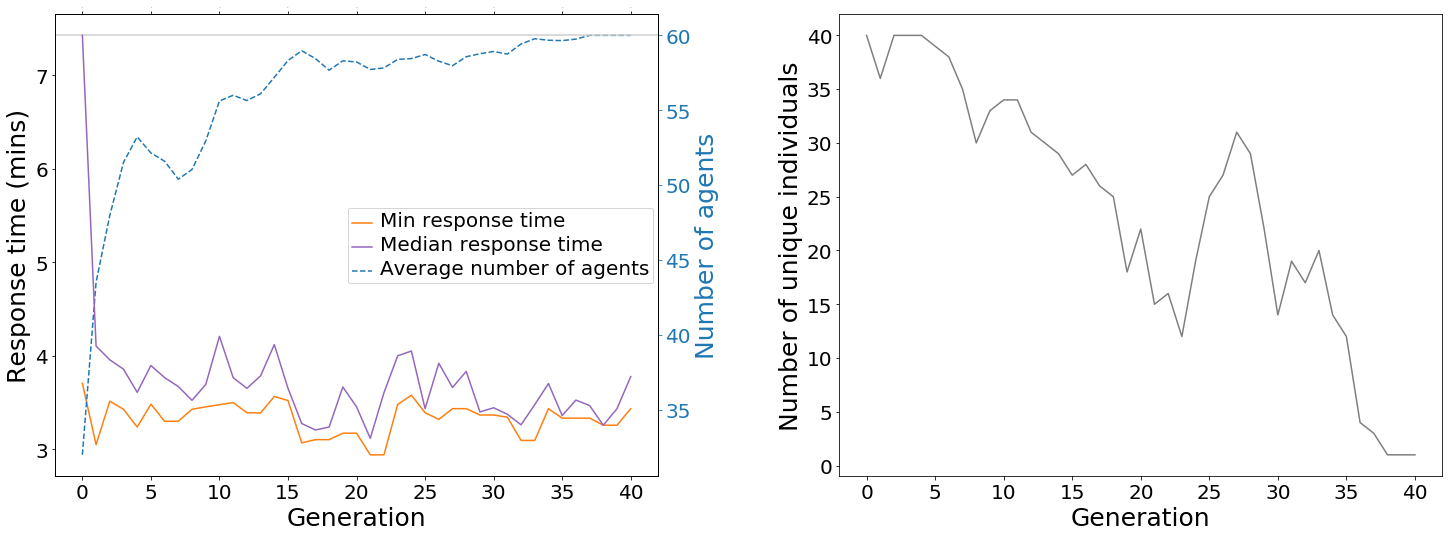

In [13]:
gen = logbook.select("gen")
fit_avg = logbook.chapters["fitness"].select("avg")
fit_med = logbook.chapters["fitness"].select("median")
fit_mins = logbook.chapters["fitness"].select("min")
num_vehicle_avgs = logbook.chapters["num_vehicles"].select("avg")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,7))
fig.tight_layout(h_pad=5, w_pad=15)


ax1 = axes[0]
line1 = ax1.plot(gen, fit_mins, color="tab:orange", label="Min response time")
ax1.set_xlabel("Generation", fontsize = 25)
ax1.set_ylabel("Response time (mins)", color="black", fontsize =25)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)


ax2 = ax1.twinx()
line2 = ax2.plot(gen, num_vehicle_avgs, color="tab:blue", label="Average number of agents", linestyle='dashed')
ax2.set_ylabel("Number of agents", color="tab:blue", fontsize = 25)
ax2.tick_params(axis='y', labelsize=20, colors="tab:blue")
ax2.axhline(60, color='#cfcfcf')



ax3 = ax1.twiny()
line3 = ax3.plot(gen, fit_med, color="tab:purple", label="Median response time")
ax3.tick_params(axis='x', labelsize=0)


    
lns = line1 +  line3 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

leg = ax1.get_legend()
leg.get_texts()[0].set_fontsize(20)
  
    
    
    
#GRAPH 2: Diversity

ax4= axes[1]
list_num_unique_strat = []
for gen in range(0, len(logbook)):
    with open('population_gen_{}_scenario1'.format(gen), 'rb') as f:
        test = pickle.load(f)
    list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in test)]))

line1 = ax4.plot(range(0, len(logbook)), list_num_unique_strat, "-", color="tab:grey",  label="Min Fitness")
ax4.set_xlabel("Generation", fontsize = 25)
ax4.set_ylabel("Number of unique individuals", color="black", fontsize = 25)
ax4.tick_params(axis='x', labelsize= 20)
ax4.tick_params(axis='y', labelsize= 20)

#plt.savefig('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/Images/GA/GA_learning_scenario1.png', bbox_inches = 'tight')

plt.show()

In [14]:
import random 
random.random()

0.37794477382170044

## Visualise loss of diversity in population

In [15]:
gen = 40
with open('population_gen_{}_scenario1'.format(gen), 'rb') as f:
    test = pickle.load(f)
    
print('Unique strategies after {} generation :'.format(gen))

len([x for x in set(tuple(x) for x in test)])
#[sum(x) for x in set(tuple(x) for x in test)]

Unique strategies after 40 generation :


1

In one generation, the number of unique individuals is almost halved. Huge loss of diversity

## Visualise best individuals

In [16]:
"""with open('best_ind_scenario1', 'rb') as f:
    best_ind=pickle.load(f)
sum(best_ind)"""

"with open('best_ind_scenario1', 'rb') as f:\n    best_ind=pickle.load(f)\nsum(best_ind)"

In [17]:
with open('dict_final_pop_scenario1.pkl', 'rb') as f:
    dict_final_pop =pickle.load(f)
len(set(list(dict_final_pop.keys())))

1

In [18]:
# remove ind > 77
new_dict_final_pop = {k: round(v, 3) for k, v in dict_final_pop.items() if sum(k) <= 60}
len(new_dict_final_pop)

1

In [19]:
list(new_dict_final_pop.values())

[3.546]

### Get the best ind and their fitness

In [20]:
#unique_final_pop.index(best_ind)

In [21]:
minval = min(new_dict_final_pop.values())
best_ind = [k for k, v in new_dict_final_pop.items() if v==minval][0]
sum(best_ind)

60

In [22]:
[v for k, v in new_dict_final_pop.items() if v==minval][0]

3.546

In [26]:
os.getcwd()

'/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch'

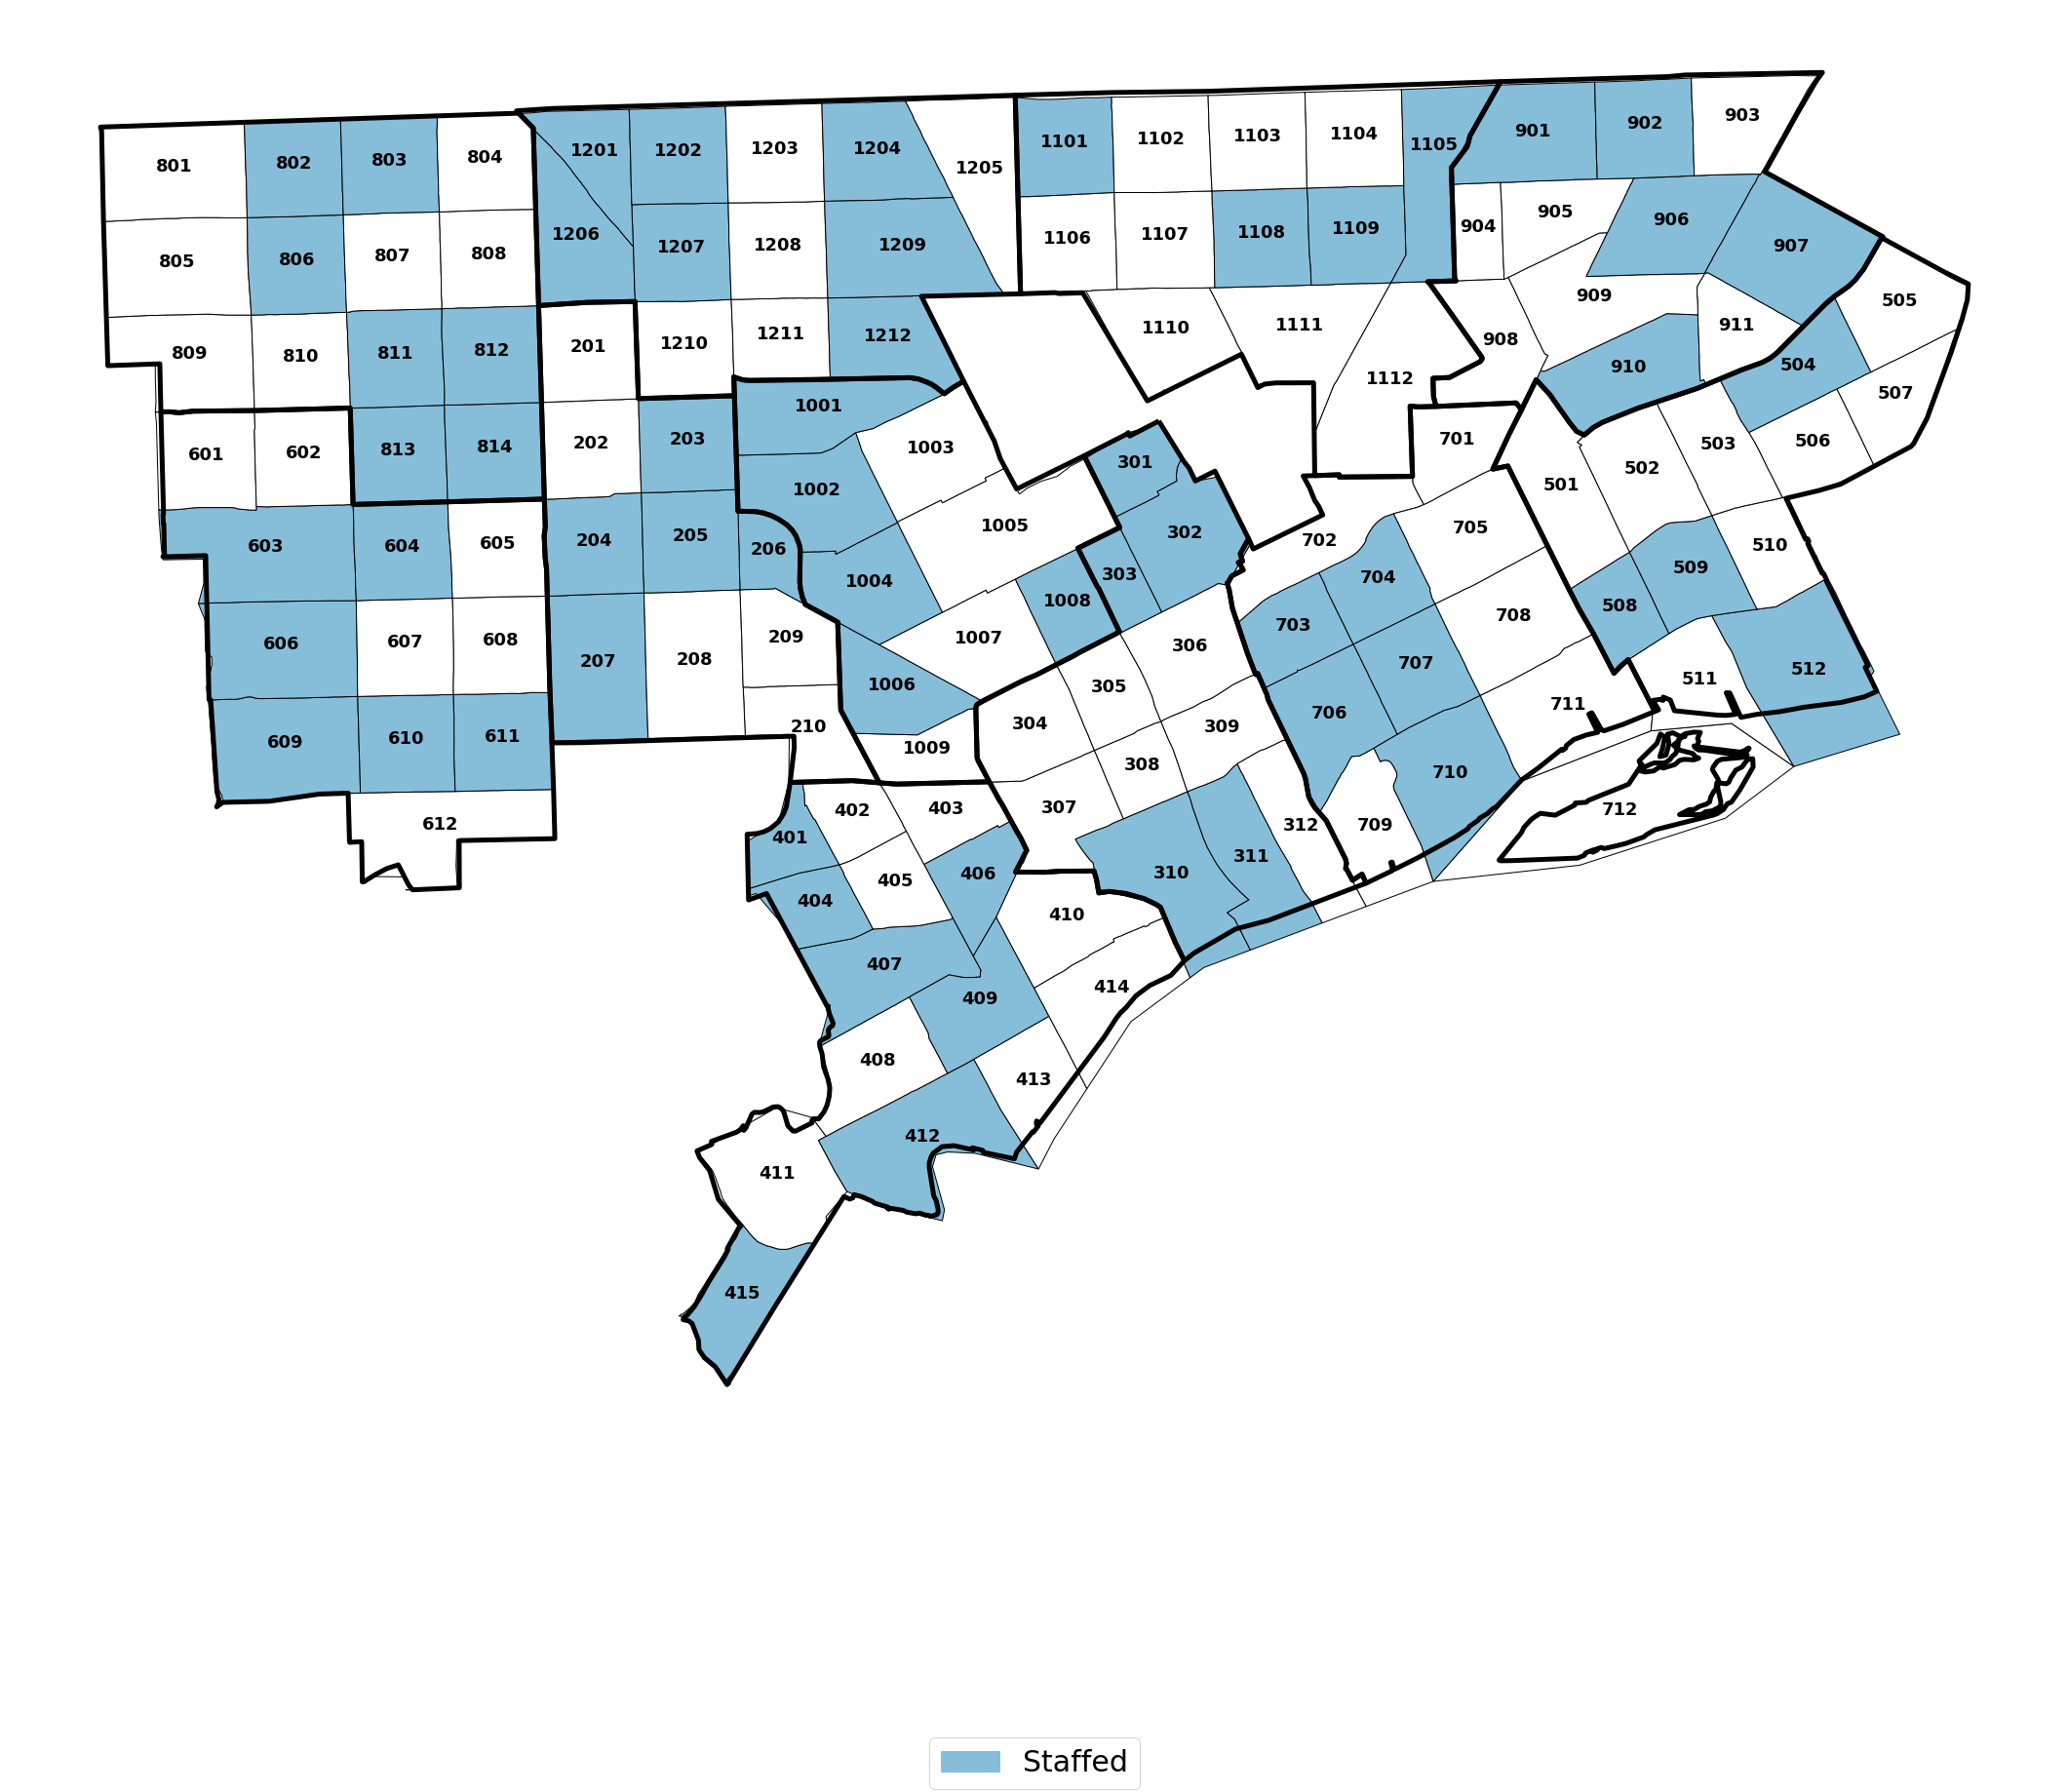

In [27]:
plotConfiguration(best_ind)

plt.savefig('./Images/GA/GA_single_obj_best_ind_map_scenario1.png', bbox_inches = 'tight')
plt.show()

IndexError: list index out of range

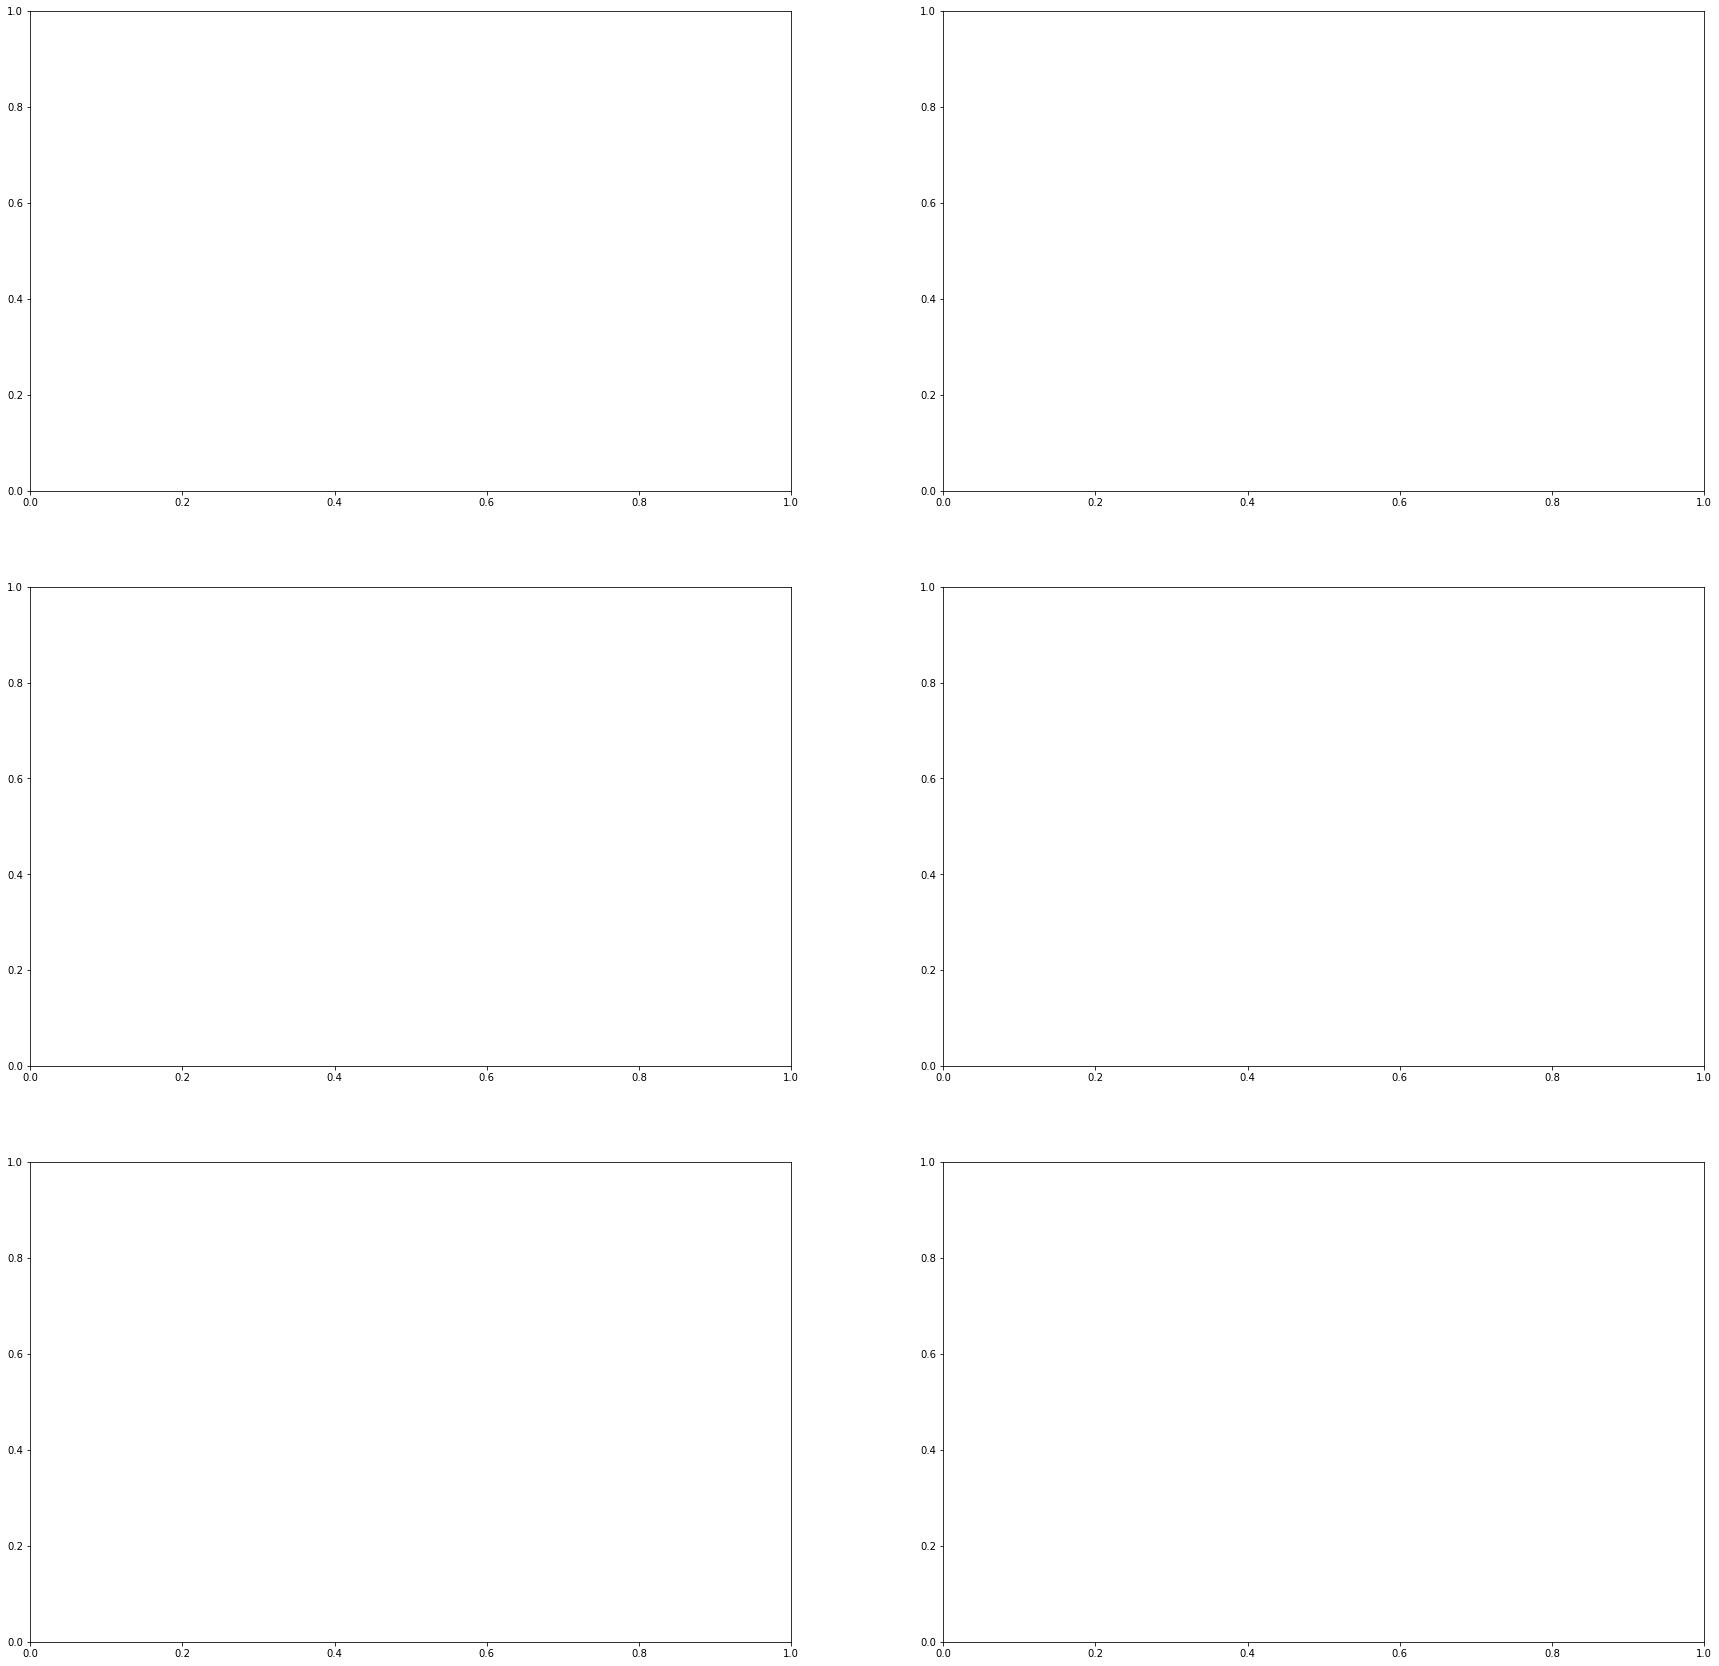

In [28]:
plotConfigs('Images/GA/examples_final_pop_single_obj_scenario1.png', new_dict_final_pop, best_ind)
os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario1/')

In [ ]:
# 303 is different

# Scenario 2

In [29]:
os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario2/')
print(os.getcwd())

/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario2


In [30]:
with open('logbook_file_scenario2', 'rb') as f:
    logbook = pickle.load(f)
logbook

[{'gen': 0,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 39, 1, 601680)},
 {'gen': 1,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 41, 22, 586259)},
 {'gen': 2,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 43, 44, 65363)},
 {'gen': 3,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 45, 50, 454053)},
 {'gen': 4,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 48, 13, 882237)},
 {'gen': 5,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 50, 40, 534652)},
 {'gen': 6,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 52, 59, 372144)},
 {'gen': 7,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 55, 33, 85110)},
 {'gen': 8,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 16, 57, 51, 228677)},
 {'gen': 9,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 17, 0, 9, 771182)},
 {'gen': 10,
  'nevals': 40,
  'time': datetime.datetime(2022, 8, 27, 17, 2, 25, 311386)},
 {'g

In [31]:
logbook.chapters["fitness"].select("std")

[14.24482029988667,
 154.964091540293,
 262.2089627056343,
 216.93007478489474,
 4.743889145250915,
 216.98503722707585,
 217.05442133230542,
 0.7800692923362443,
 217.1322769822453,
 217.18255084693382,
 298.8554529058402,
 298.7499466044837,
 355.8732404171968,
 298.8171134048214,
 355.7255958489851,
 217.09153502879744,
 329.5269635484611,
 217.17320571249238,
 217.16588493433883,
 262.49995354570683,
 0.08057966036489707,
 0.05094022218191062,
 0.13991954048899272,
 0.12511450300039667,
 0.08714089345706655,
 0.0928325658481242,
 155.53521924999666,
 0.022499317019836908,
 155.51984585641281,
 0.019371041387868878,
 217.11569881387052,
 155.53604253184443,
 0.062019230769230736,
 155.51974174947526,
 262.47579346827126,
 0.012971652578599772,
 0.05333539044154337,
 0.06677537328759758,
 0.03934124857718116,
 217.072488441359,
 155.5162053976468]

In [32]:
gen = 40
with open('population_gen_{}_scenario2'.format(gen), 'rb') as f:
    test = pickle.load(f)
    
print('Unique strategies after {} generation :'.format(gen))
[sum(list(x)) for x in set(tuple(x) for x in test)]

Unique strategies after 40 generation :


[60, 62]

In [33]:
[list(x) for x in set(tuple(x) for x in test)][0]

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1]

## Visualise the learning

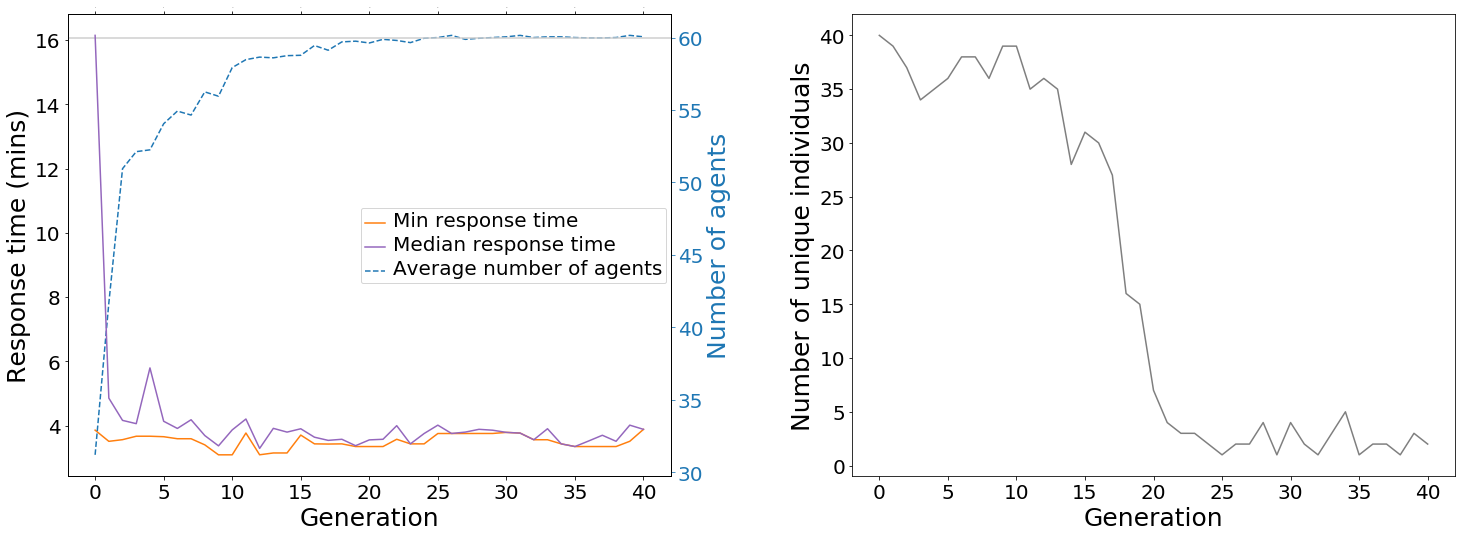

In [34]:
gen = logbook.select("gen")
fit_avg = logbook.chapters["fitness"].select("avg")
fit_med = logbook.chapters["fitness"].select("median")
fit_mins = logbook.chapters["fitness"].select("min")
num_vehicle_avgs = logbook.chapters["num_vehicles"].select("avg")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,7))
fig.tight_layout(h_pad=5, w_pad=15)


ax1 = axes[0]
line1 = ax1.plot(gen, fit_mins, color="tab:orange", label="Min response time")
ax1.set_xlabel("Generation", fontsize = 25)
ax1.set_ylabel("Response time (mins)", color="black", fontsize =25)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)


ax2 = ax1.twinx()
line2 = ax2.plot(gen, num_vehicle_avgs, color="tab:blue", label="Average number of agents", linestyle='dashed')
ax2.set_ylabel("Number of agents", color="tab:blue", fontsize = 25)
ax2.tick_params(axis='y', labelsize=20, colors="tab:blue")
ax2.axhline(60, color='#cfcfcf')



ax3 = ax1.twiny()
line3 = ax3.plot(gen, fit_med, color="tab:purple", label="Median response time")
ax3.tick_params(axis='x', labelsize=0)


    
lns = line1 +  line3 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

leg = ax1.get_legend()
leg.get_texts()[0].set_fontsize(20)
  
    
    
    
#GRAPH 2: Diversity

ax4= axes[1]
list_num_unique_strat = []
for gen in range(0, len(logbook)):
    with open('population_gen_{}_scenario2'.format(gen), 'rb') as f:
        test = pickle.load(f)
    list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in test)]))

line1 = ax4.plot(range(0, len(logbook)), list_num_unique_strat, "-", color="tab:grey",  label="Min Fitness")
ax4.set_xlabel("Generation", fontsize = 25)
ax4.set_ylabel("Number of unique individuals", color="black", fontsize = 25)
ax4.tick_params(axis='x', labelsize= 20)
ax4.tick_params(axis='y', labelsize= 20)

plt.savefig('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/Images/GA/GA_learning_scenario2.png', bbox_inches = 'tight')

plt.show()

## Visualise loss of diversity in population

In [35]:
gen = 40
with open('population_gen_{}_scenario2'.format(gen), 'rb') as f:
    test = pickle.load(f)
    
print('Unique strategies after {} generation :'.format(gen))
len([x for x in set(tuple(x) for x in test)])
#[sum(x) for x in set(tuple(x) for x in test)]

Unique strategies after 40 generation :


2

In [36]:
len(test)

40

## ❤️ Final figure for both scenarios

In [37]:
def plot2Graphs(logbook, axes, list_num_unique_strat) :
    gen = logbook.select("gen")
    fit_avg = logbook.chapters["fitness"].select("avg")
    fit_med = logbook.chapters["fitness"].select("median")
    fit_mins = logbook.chapters["fitness"].select("min")
    num_vehicle_avgs = logbook.chapters["num_vehicles"].select("avg")
    
    ax1 = axes[0]
    line1 = ax1.plot(gen, fit_mins, color="tab:orange", label="Min response time")
    ax1.set_xlabel("Generation", fontsize = 20)
    ax1.set_ylabel("Response time (mins)", color="black", fontsize =20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)

    ax1.set_title('Resp. time and num. of agents across individuals', fontsize = 25, )


    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, num_vehicle_avgs, color="tab:blue", label="Average number of agents", linestyle='dashed')
    ax2.set_ylabel("Number of agents", color="tab:blue", fontsize = 20)
    ax2.tick_params(axis='y', labelsize=20, colors="tab:blue")
    ax2.axhline(60, color='#cfcfcf')



    ax3 = ax1.twiny()
    line3 = ax3.plot(gen, fit_med, color="tab:purple", label="Median response time")
    ax3.tick_params(axis='x', labelsize=0)



    lns = line1 +  line3 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="center right")

    leg = ax1.get_legend()
    leg.get_texts()[0].set_fontsize(20)




    #GRAPH 2: Diversity

    ax4= axes[1]
    
    line1 = ax4.plot(range(0, len(logbook)), list_num_unique_strat, "-", color="tab:grey",  label="Min Fitness")
    ax4.set_xlabel("Generation", fontsize = 20)
    ax4.set_ylabel("Number of unique individuals", color="black", fontsize = 20)
    ax4.tick_params(axis='x', labelsize= 20)
    ax4.tick_params(axis='y', labelsize= 20)
    
    ax4.set_title('Population diversity', fontsize = 25, )
    


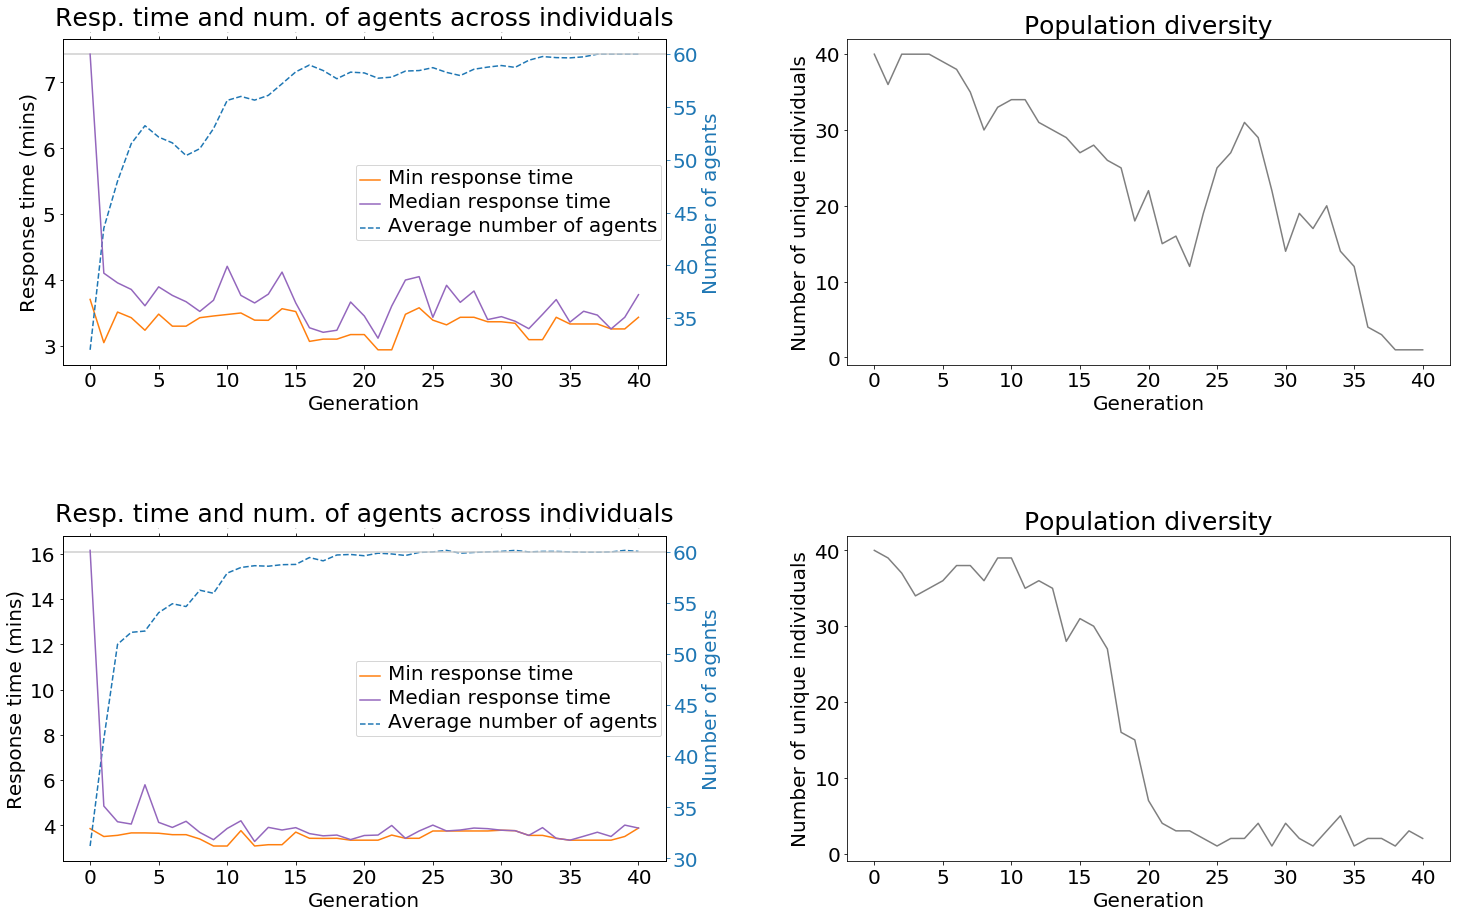

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20,12))
fig.tight_layout(h_pad=15, w_pad=15)

os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/')

with open('./Scenario1/logbook_file_scenario1', 'rb') as f:
    logbook = pickle.load(f)
    list_num_unique_strat = []
    for gen in range(0, len(logbook)):
        with open('./Scenario1/population_gen_{}_scenario1'.format(gen), 'rb') as f:
            test = pickle.load(f)
            list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in test)]))

    plot2Graphs(logbook, axes[0], list_num_unique_strat)
    

with open('./Scenario2/logbook_file_scenario2', 'rb') as f:
    logbook = pickle.load(f)
    list_num_unique_strat = []
    for gen in range(0, len(logbook)):
        with open('./Scenario2/population_gen_{}_scenario2'.format(gen), 'rb') as f:
            test = pickle.load(f)
            list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in test)]))


    plot2Graphs(logbook, axes[1], list_num_unique_strat)
    
plt.savefig('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/Images/GA/Single_GA_learning.png', bbox_inches = 'tight')

plt.show()

## Visualise best individuals

In [39]:
"""with open('best_ind_scenario2", 'rb') as f:
    best_ind=pickle.load(f)
sum(best_ind)"""

'with open(\'best_ind_scenario2", \'rb\') as f:\n    best_ind=pickle.load(f)\nsum(best_ind)'

In [40]:
os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario2/')

In [41]:
with open('dict_final_pop_scenario2.pkl', 'rb') as f:
    dict_final_pop =pickle.load(f)
len(set(list(dict_final_pop.keys())))

1

In [42]:
# remove ind > 77
new_dict_final_pop = {k: round(v, 3) for k, v in dict_final_pop.items() if sum(k) <= 60}
len(new_dict_final_pop)

1

In [43]:
list(new_dict_final_pop.values())

[3.785]

### Get the best ind and their fitness

In [44]:
#unique_final_pop.index(best_ind)

In [45]:
minval = min(new_dict_final_pop.values())
best_ind = [k for k, v in new_dict_final_pop.items() if v==minval][0]
sum(best_ind)

60

In [46]:
[v for k, v in new_dict_final_pop.items() if v==minval][0]

3.785

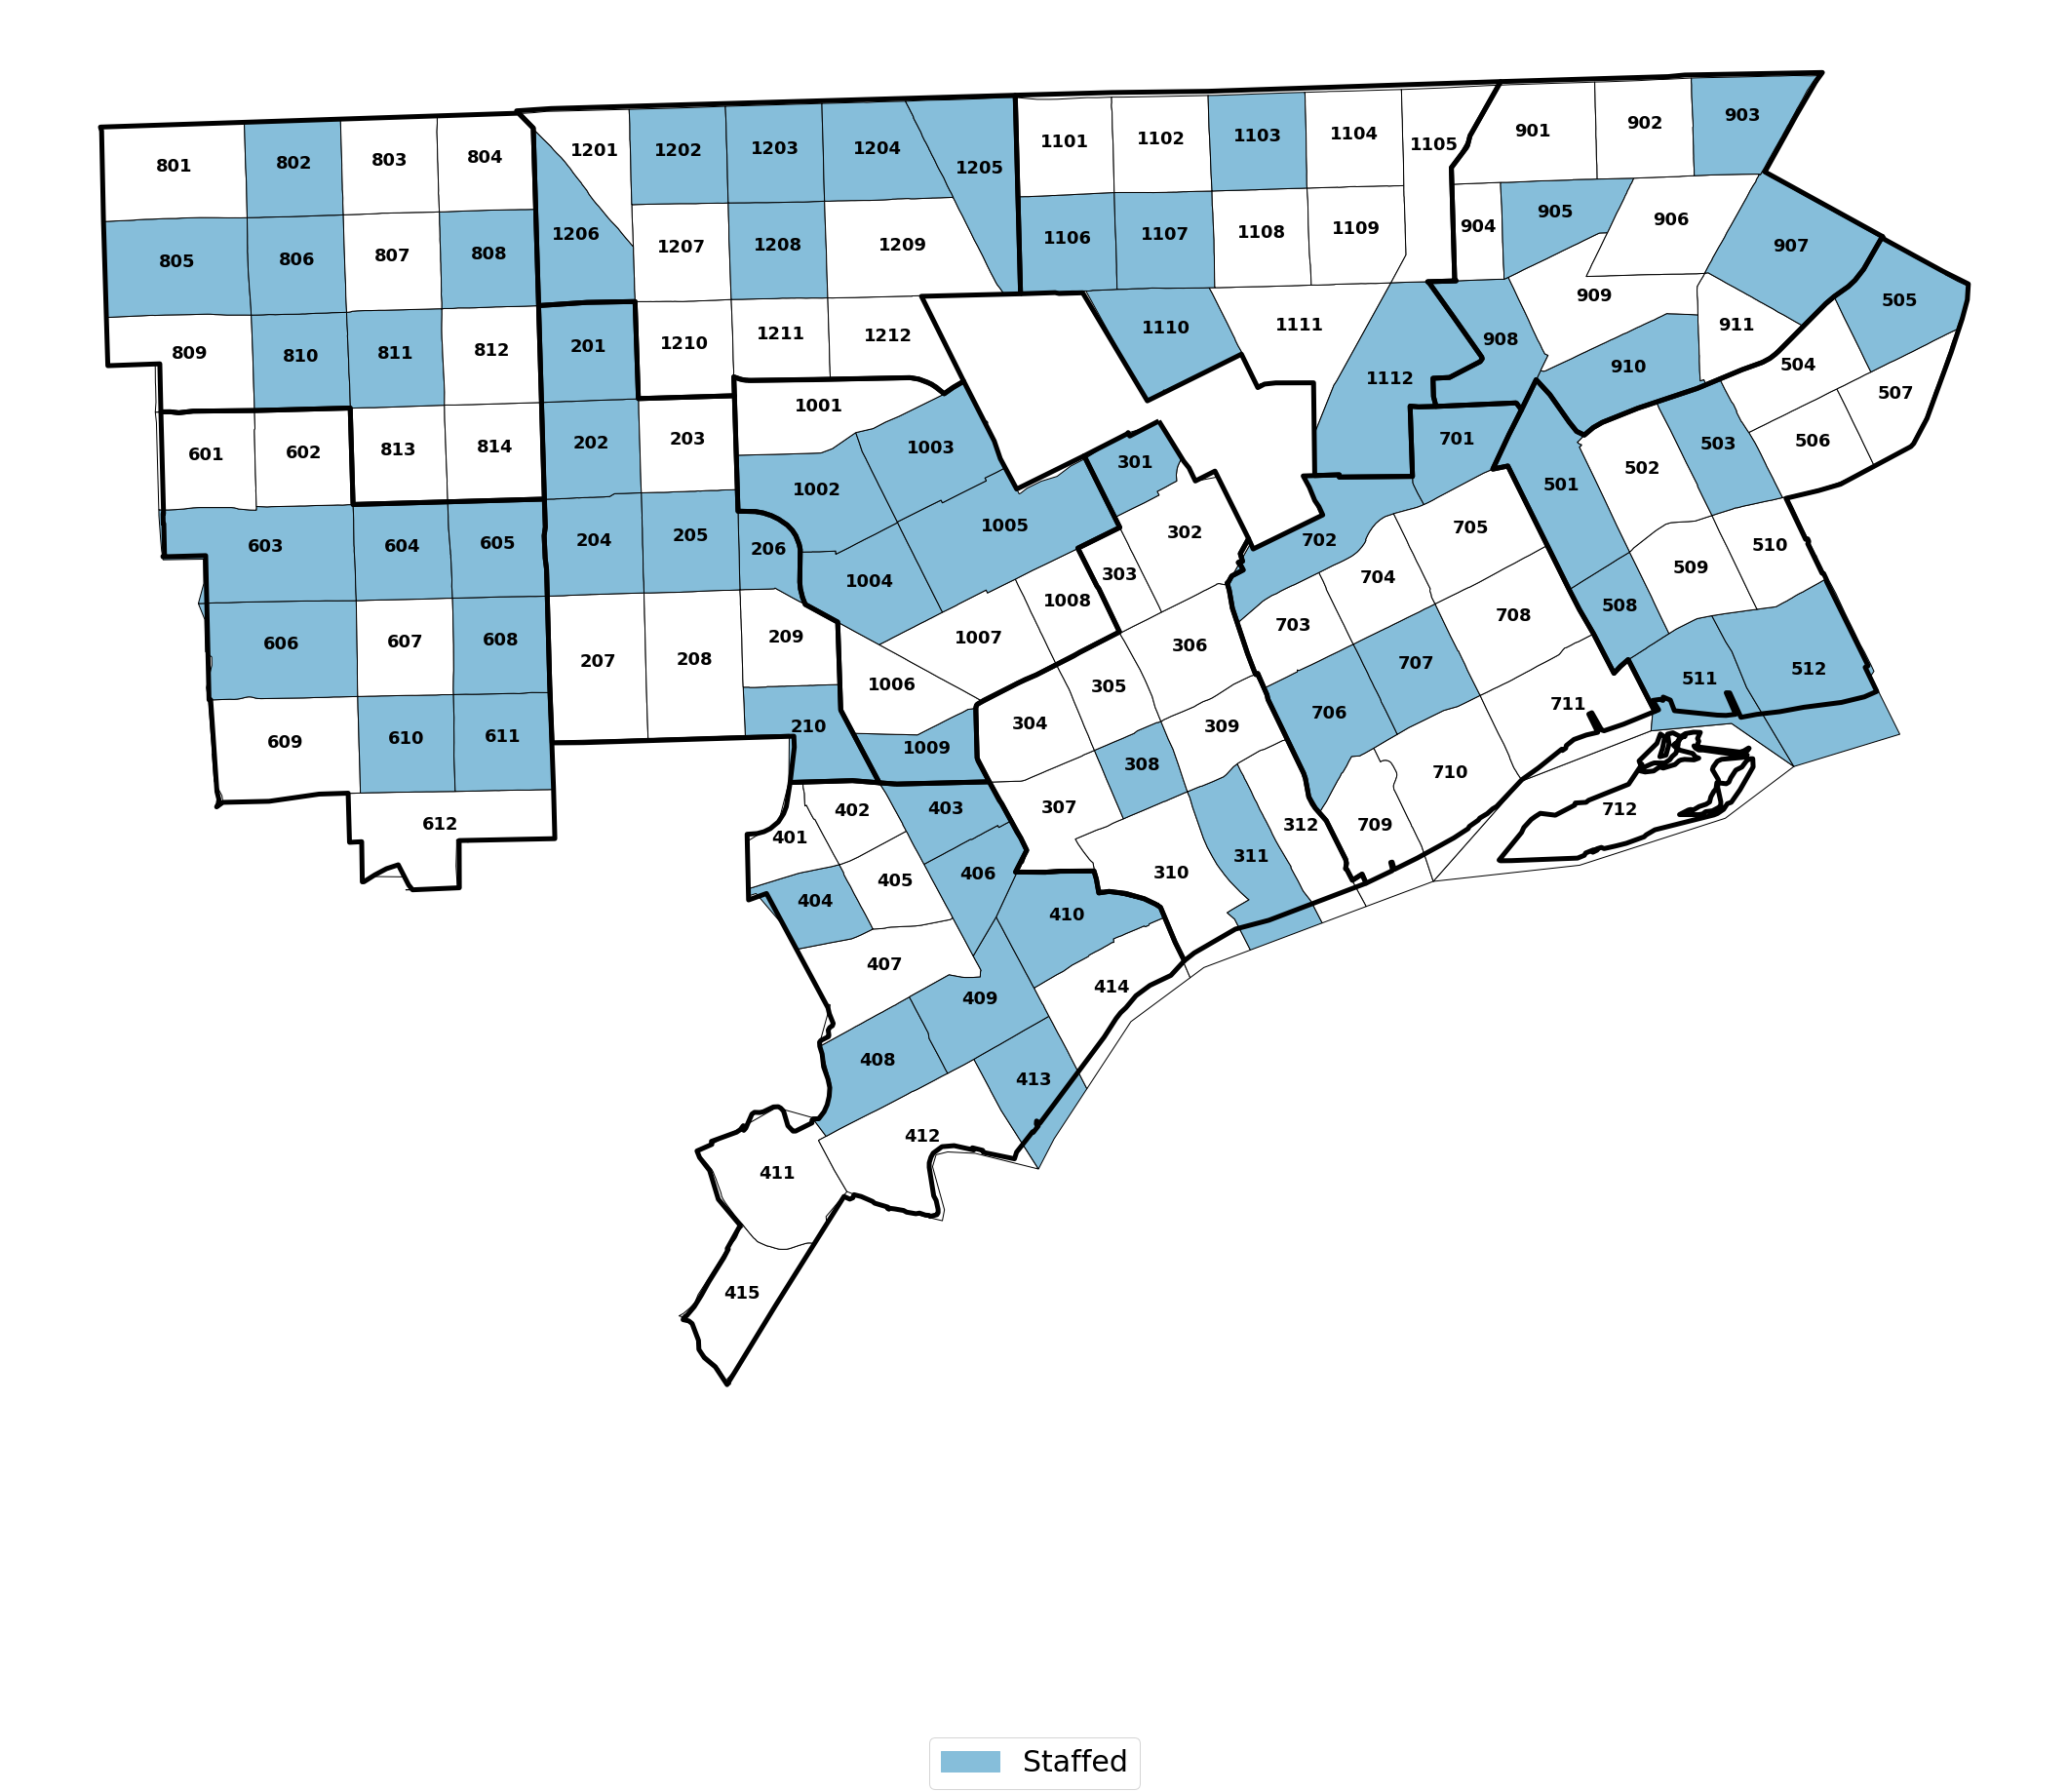

In [48]:
plotConfiguration(best_ind)
plt.savefig('./Images/GA/GA_single_obj_best_ind_map_scenario2.png', bbox_inches = 'tight')
plt.show()

In [ ]:
plotConfigs('Images/GA/examples_final_pop_single_obj_scenario2.png', new_dict_final_pop, best_ind)
os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario2/')

## Compare to simple config

We can only look at average response time across all test shifts 
1. Create a df long format with 100 rows for T and 100 rows for GA_best
3. Map comparison
2. Run a T-test to see if difference is significant


### Map comparison

In [49]:
scenario = 2

os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/')

In [50]:
with open('./GA1_experiment/Single_obj/Scenario{}/best_ind_scenario{}'.format(scenario, scenario), 'rb') as f:
    best_ind=pickle.load(f)

In [51]:
import warnings
import sys
sys.path.append('./Model/Framework/')
import Env

# Get all the incidents for the 100 training_set time periods (2018) 
def getIncidentsForScenario(incidents, scenario_num):
    with open('./ABM_experiments/training_set_scenario{}.pkl'.format(scenario_num), 'rb') as f:
        training_set_scenario = pickle.load(f)

    incidents['Patrol_beat'] = incidents['Patrol_beat'].apply(str)
    #historical_crimes['Precinct'] = historical_crimes['Precinct'].apply(str)
    incidents.Date_Time = pd.to_datetime(incidents.Date_Time)
    # get the incidents that occured in each shift
    historical_incidents_scenario = pd.DataFrame()
    for shift in training_set_scenario:
        historical_incidents_scenario = historical_incidents_scenario.append(incidents[(incidents['Date_Time'] >= shift[0]) & 
                                    (incidents['Date_Time'] < shift[1])])


    return historical_incidents_scenario

def get_ABM_env(ABM_START_DATETIME, ABM_END_DATETIME, scenario) :
    warnings.filterwarnings('ignore')

    # historical_crimes is used in ABM_env to calculate score on patrolling edges
    # historical_cfs not used in ABM_env but we use it to calculate the targeted configuraiton 
    # we select those CFS incidents from training set 2018
    historical_cfs = pd.read_csv("./data/incidents.csv")
    historical_cfs_scenario = getIncidentsForScenario(historical_cfs, scenario)
    historical_crimes = pd.read_csv("./data/Crimes_edited_preprocessed.csv")
    historical_crimes_scenario = getIncidentsForScenario(historical_crimes, scenario)


    cfs_incidents = pd.read_csv("./data/incidents.csv")
    cfs_incidents.Date_Time = pd.to_datetime(cfs_incidents.Date_Time)
    cfs_incidents.Date_Time = cfs_incidents.Date_Time.dt.tz_localize(None)
    cfs_incidents['Patrol_beat'] = cfs_incidents['Patrol_beat'].apply(str)
    cfs_incidents['Precinct'] = cfs_incidents['Precinct'].apply(str)
    # get all incidents within the time interval of the shift
    cfs_incidents_shift= cfs_incidents[(cfs_incidents['Date_Time'] >= ABM_START_DATETIME) & 
                                    (cfs_incidents['Date_Time'] < ABM_END_DATETIME)]


    ABM_env = Env.Environment('./', cfs_incidents_shift, ABM_START_DATETIME, ABM_END_DATETIME, historical_cfs_scenario = historical_cfs_scenario, historical_crimes_scenario = historical_crimes_scenario)
    warnings.filterwarnings('default')
    print('... env imported.')
    return ABM_env

# ABM_env is needed to get the patrol beats only
def getTargettedConfig(k, ABM_env, historical_data_type = 'CFS') :
    # Init the configuration with zero agent in each patrol beat
    list_num_agents_scas = np.zeros((len(ABM_env.patrol_beats),), dtype=int)

    # CHOOSE k HOTTEST SCAS in force
    if historical_data_type == 'CFS' :
        list_num_crimes = [len(sca.historical_cfs) for sca in ABM_env.patrol_beats]
    else :
        # get the list of num of crimes 
        list_num_crimes = [len(sca.historical_crimes) for sca in ABM_env.patrol_beats]
        
        
    # create a dictionnary {beat : num_crimes} combining both lists
    dict_crime_in_beats = dict(zip(ABM_env.patrol_beats, list_num_crimes))
    # get k pairs (beat, num_crimes)
    ordered_list_beats = sorted(dict_crime_in_beats.items(), key=lambda item: item[1], reverse=True)[:k]
    # get only the beat part of that pair
    chosen_scas = [pair[0] for pair in ordered_list_beats]

    for sca in chosen_scas:
        list_index = ABM_env.patrol_beats.index(sca)
        list_num_agents_scas[list_index] = 1

    # create config dict
    pairs = zip(ABM_env.patrol_beats, list_num_agents_scas)
    # Create a dictionary from zip object
    configuration = dict(pairs)
    return configuration

In [52]:
with open('./ABM_experiments/testing_set_scenario{}.pkl'.format(scenario), 'rb') as f:
    list_shifts = pickle.load(f)
    
# We pick the first shit of the 100 shifts in test set to run the ABM on
shift = list_shifts[0]
ABM_START_DATETIME = shift[0]
ABM_END_DATETIME = shift[1]


ABM_env_scenario = get_ABM_env(ABM_START_DATETIME, ABM_END_DATETIME, scenario=scenario)


38 streets with incidents found in beat 415
22 streets with incidents found in beat 411
25 streets with incidents found in beat 412
20 streets with incidents found in beat 413
47 streets with incidents found in beat 408
48 streets with incidents found in beat 407
87 streets with incidents found in beat 409
32 streets with incidents found in beat 414
92 streets with incidents found in beat 410
39 streets with incidents found in beat 404
75 streets with incidents found in beat 405
51 streets with incidents found in beat 406
73 streets with incidents found in beat 612
@@@@@@@ No path was found between nodes [62965025] and target 62577462
@@@@@@@ No path was found between nodes [62651064, 62665037, 62701096, 62815618] and target 62577462
@@@@@@@ No path was found between nodes [62651063, 62651065, 62965030, 62665035, 62665039, 62831671, 62651065, 62665039, 62709213, 62651063, 62665035, 62721224] and target 62577462
@@@@@@@ No path was found between nodes [62651062, 62815625, 62651069, 6270

127 streets with incidents found in beat 310
37 streets with incidents found in beat 401
37 streets with incidents found in beat 402
35 streets with incidents found in beat 403
235 streets with incidents found in beat 311
52 streets with incidents found in beat 307
120 streets with incidents found in beat 709
242 streets with incidents found in beat 312
57 streets with incidents found in beat 308
31 streets with incidents found in beat 1009
45 streets with incidents found in beat 609
42 streets with incidents found in beat 610
53 streets with incidents found in beat 611
73 streets with incidents found in beat 710
60 streets with incidents found in beat 210
130 streets with incidents found in beat 309
58 streets with incidents found in beat 304
101 streets with incidents found in beat 706
47 streets with incidents found in beat 305
110 streets with incidents found in beat 711
73 streets with incidents found in beat 1006
61 streets with incidents found in beat 606
92 streets with inciden

In [53]:
targeted_config = getTargettedConfig(k = 60, ABM_env = ABM_env_scenario1, historical_data_type = 'CFS')
targeted_config = list(targeted_config.values())
plotConfiguration(targeted_config)

NameError: name 'ABM_env_scenario1' is not defined

In [ ]:
plotConfiguration(best_ind)

In [ ]:
### LINEAR SCALE
# https://www.axismaps.com/guide/choropleth
def plotConfigurationDiff(config, colour = '#86beda', legend_label = 'Staffed'):

    import geopandas as gpd
    os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/')

    precincts = gpd.read_file('./data/DPD_Precincts/dpd_precincts.shp')

    scas = gpd.read_file('./data/DPD_Scout_Car_Areas-shp/DPD_SCAs_preprocessed.shp')
    scas.loc[:,['name']] = scas.name.astype('int64')
    #scas = scas.join(num_inc_df, on = 'name')
    # create new column with has_patrol (config)
    scas['has_patrol'] = config
    #scas['has_patrol'] = ['Staffed' if sca['has_patrol'] else 'Unstaffed' for index, sca in scas.iterrows()]
    scas['has_patrol'] = scas['has_patrol'].astype('str')



    # create simple linear colormap that maps grey to blue
    cmap = ListedColormap(['tab:purple', colour, 'white', '#ee92b7'])

    fig, ax = plt.subplots(1, figsize=(30, 30))
    fig.tight_layout()


    scas.plot(ax=ax, column='has_patrol', edgecolor= 'black', legend=True, categorical=True, cmap=cmap, label='has_patrol', legend_kwds={'loc': 'lower right'})
    #scas.apply(lambda x: ax.annotate(s=int(x['name']), xy=x.geometry.centroid.coords[0], ha='center', fontfamily = 'sans-serif', weight='bold', fontsize=18),axis=1);

    """leg = ax.get_legend()
    leg.set_title('Beat is staffed in:')
    leg.get_title().set_fontsize('30')
    #leg.set_bbox_to_anchor((1.2,0))
    leg.get_texts()[0].set_fontsize('30')
    # remove frame legend
    leg.get_frame().set_linewidth(0.0)"""
        
    from matplotlib.patches import Patch   

    #patch1 = Patch(color='green', label='None', linestyle = "--")
    patch2 = Patch(color='#ee92b7', label='Targeted configuration', linestyle = "--")
    patch3 = Patch(color=colour, label='GA-identified configuration', linestyle = "--")
    patch4 = Patch(color='tab:purple', label='Both configurations', linestyle = "--")
    
    plt.legend((patch2, patch3, patch4),('Targeted configuration','GA-identified configuration', 'Both configurations'),
               numpoints=1, loc=4, prop={'size': 30}, title='Beat is staffed in:')
    
    leg = ax.get_legend()
    leg.get_title().set_fontsize('30')
    leg.get_frame().set_linewidth(0.0)




    for index, sca in scas.iterrows():
        if sca['name'] == 712 :
            ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        textcoords="offset points", # how to position the text
                        xytext=(0,-15),
                        ha='center')
        elif sca['name'] == 1105 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(0,25),
                            ha='center')
        elif sca['name'] == 702 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(0,-10),
                            ha='center')
        elif sca['name'] == 908 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(10,0),
                            ha='center')
        else : 
            ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            ha='center')




    #Precincts
    precincts.boundary.plot(ax=ax, linewidth = 5, color = 'black', zorder = 1)


    ## LEGEND COLORBAR
    """sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=scas['num_inc_per_day_per_area'].min(), vmax=scas['num_inc_per_day_per_area'].max()))
    cbar = plt.colorbar(sm, fraction=0.025, pad=0.02, orientation= 'horizontal')
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label(label='Average daily number of historical crimes per km2',size=25)
     """

    ax.axis('off')

In [ ]:
liste = []
for x,y in zip(targeted_config,best_ind) :
    if x == 1 :
        if y == 1 :
            liste.append('Both')
        else : 
            liste.append('Targeted')
    else :
        if y == 1 :
            liste.append('GA-identified')
        else : 
            liste.append('None')
            

In [ ]:
plotConfigurationDiff(liste, legend_label = 'Different between targeted and GA-identified configuration')
plt.savefig('./Images/GA/GA_single_obj_diff_T_and_GA_scenario{}.png'.format(scenario), bbox_inches = 'tight')
plt.show()

### Compare response times

In [54]:
scenario = 1

In [55]:
with open('./ABM_experiments/results_benchmark_scenario{}.pkl'.format(scenario),'rb') as f:
    targeted_df = pickle.load(f)
targeted_df

,num_agents,configuration,avg_response_time,percent_failed,deterrence,avg_time_patrolling
0,10,T,9.520000,5.714286,412,334.600000
1,10,R,5.619048,0.000000,427,326.000000
2,20,T,4.038462,0.000000,768,373.600000
3,20,R,5.320000,2.857143,867,377.800000
4,30,T,4.257143,0.000000,1296,376.566667
...,...,...,...,...,...,...
1195,40,R,4.936170,2.127660,1566,377.550000
1196,50,T,4.521739,4.255319,2361,387.740000
1197,50,R,3.957447,0.000000,2055,388.400000
1198,60,T,3.680851,0.000000,2876,395.150000


In [56]:
with open('./GA1_experiment/Single_obj/Scenario{}/list_of_shift_dfs_scenario{}.pkl'.format(scenario, scenario), 'rb') as f:
    best_ind_df =pickle.load(f)
best_ind_df

[     Index Precinct Patrol_beat           Date_Time  Real_dispatch_time  \
 0   111068        5         502 2019-03-19 08:02:14                 1.5   
 1   111069        2         203 2019-03-19 08:04:04                 1.5   
 2   111070        7         702 2019-03-19 08:20:57                 1.5   
 3   111071        8         806 2019-03-19 08:38:13                 0.0   
 4   111072        2         204 2019-03-19 08:58:18                 1.6   
 5   111073        9         903 2019-03-19 09:30:38                 2.6   
 6   111074        6         608 2019-03-19 10:18:28                 0.7   
 7   111075       12        1203 2019-03-19 10:26:09                 2.5   
 8   111076       10        1008 2019-03-19 10:50:34                 8.9   
 9   111077       10        1005 2019-03-19 12:16:27                 1.4   
 10  111078       10        1003 2019-03-19 12:22:31                 2.6   
 11  111079       12        1210 2019-03-19 12:25:53                 0.4   
 12  111080 

In [58]:
def get_df_for_scenario(scenario) :
    os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/')

    ## TARGETED IND RESULT DF
    with open('./ABM_experiments/results_benchmark_scenario{}.pkl'.format(scenario),'rb') as f:
        targeted_df = pickle.load(f)
    df = targeted_df[(targeted_df['num_agents'] == 60) & (targeted_df['configuration'] == 'T')][['configuration', 'avg_response_time', 'percent_failed']]


    ## GA-TARGETED RESULT DF
    with open('./GA1_experiment/Single_obj/Scenario{}/list_of_shift_dfs_scenario{}.pkl'.format(scenario, scenario), 'rb') as f:
        best_ind_df_scenario2 =pickle.load(f)

        
    fail_threshold = 15 # <--- CHANGE HERE
    list_resp_time = []
    for shift in best_ind_df_scenario2 :
        avg_resp_time = np.mean(shift['Dispatch_time'] + shift['Travel_time'])
       
        # number of failed responses
        num_failed= len(shift[shift['Dispatch_time'] + shift['Travel_time'] > fail_threshold])
        percent_failed=(num_failed/len(shift))*100

        #list_resp_time.append(avg_resp_time)

        insert_row = {
            "configuration": 'GA',
            "avg_response_time": avg_resp_time,
            "percent_failed" : percent_failed
        }

        df = pd.concat([df, pd.DataFrame([insert_row])])

    return df

In [59]:
df1 = get_df_for_scenario(1)
df1['scenario'] = 1
df2 = get_df_for_scenario(2)
df2['scenario'] = 2
#df.reset_index(inplace=True)
df = pd.concat([df1, df2])
df

,configuration,avg_response_time,percent_failed,scenario
10,T,3.428571,0.000000,1
22,T,3.333333,0.000000,1
34,T,3.666667,0.000000,1
46,T,5.000000,2.702703,1
58,T,3.225806,0.000000,1
...,...,...,...,...
0,GA,3.811321,0.000000,2
0,GA,3.760563,0.000000,2
0,GA,3.814815,1.234568,2
0,GA,3.842857,0.000000,2


Text(0, 0.5, 'Incident response time (mins)')

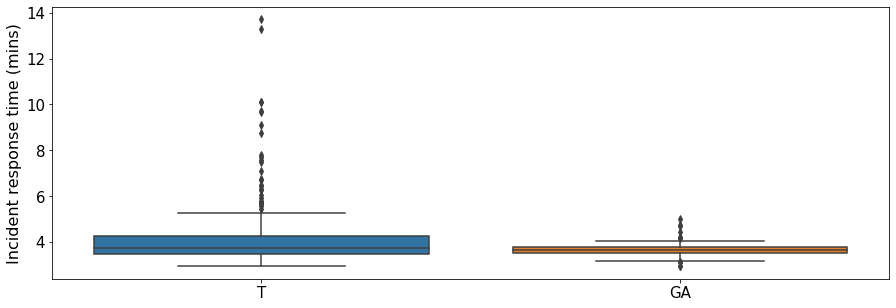

In [60]:
# plot the boxplot 
f, ax = plt.subplots(1, figsize=(15, 5))


ax = sns.boxplot(x="configuration", y="avg_response_time", data=df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0,  fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set(xlabel=None)


ax.set_ylabel('Incident response time (mins)', fontsize = 16)


#ax.set_ylim(0,20)

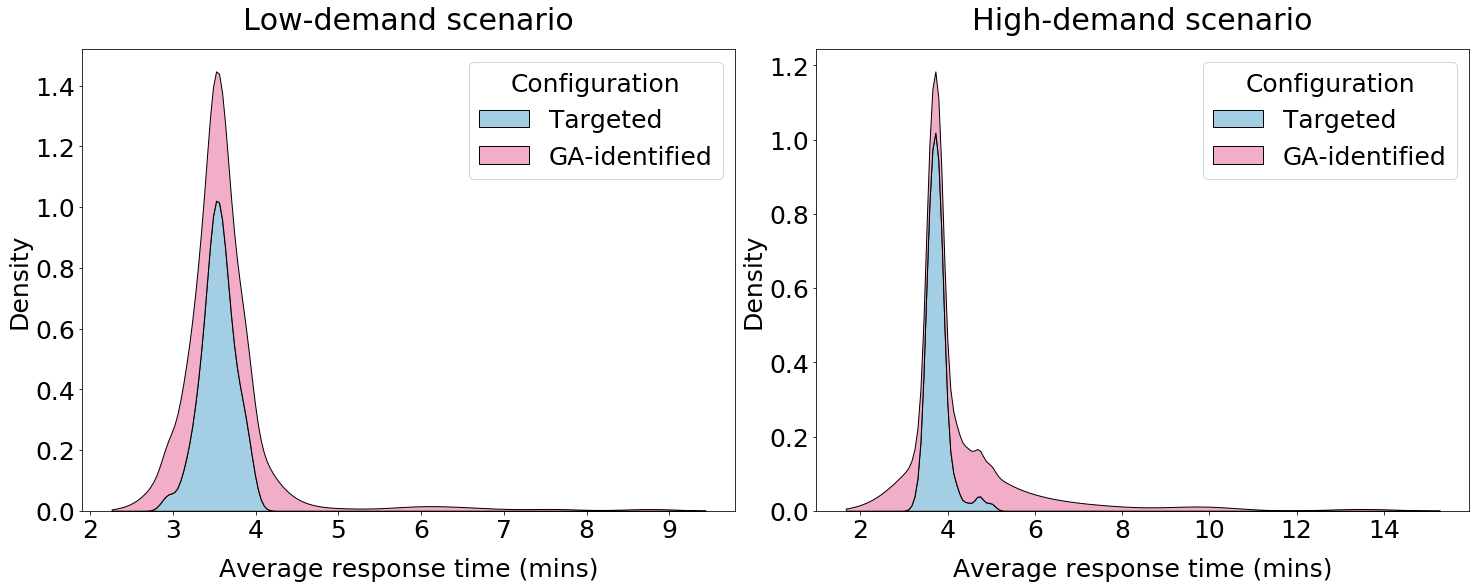

In [61]:
f, axes = plt.subplots(1, 2, figsize=(20, 7))
f.tight_layout(h_pad=10, w_pad=5)

light_blue = '#86beda'


## LOW-DEMAND SCENARIO
ax1= axes[0]
sns.kdeplot(data=df[df['scenario'] == 1], x="avg_response_time", hue="configuration", multiple="stack", ax=ax1, palette={'GA': light_blue, 'T': '#ee92b7'})

ax1.legend(title='Configuration', loc='upper right', labels=['Targeted', 'GA-identified'],prop={'size': 25})
leg = ax1.get_legend()
#leg.set_title('Staffed')
leg.get_title().set_fontsize('25')


ax1.set_xlabel('Average response time (mins)', fontsize = 25, labelpad=15)
    
ax1.set_ylabel('Density', fontsize = 25)

ax1.tick_params(axis='x', labelsize=25)
ax1.tick_params(axis='y', labelsize=25)

ax1.set_title('Low-demand scenario', fontsize=30, pad=20)

## HIGH-DEMAND SCENARIO
ax2= axes[1]
sns.kdeplot(data=df[df['scenario'] == 2], x="avg_response_time", hue="configuration", multiple="stack", ax=ax2, palette={'GA': light_blue, 'T': '#ee92b7'})

ax2.legend(title='Configuration', loc='upper right', labels=['Targeted', 'GA-identified'],prop={'size': 25})
leg = ax2.get_legend()
#leg.set_title('Staffed')
leg.get_title().set_fontsize('25')

ax2.set_xlabel('Average response time (mins)', fontsize = 25, labelpad=15)
    
ax2.set_ylabel('Density', fontsize = 25)

ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

ax2.set_title('High-demand scenario', fontsize=30, pad=20)




plt.savefig('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/Images/GA/GA_single_obj_comparison_distributions.png', bbox_inches = 'tight')

plt.show()

In [62]:
result = df[['configuration', 'scenario', 'avg_response_time', 'percent_failed']].groupby(by=['configuration', 'scenario']).agg(['mean', 'std'])
result.rename(columns={"num_agents": "Number of agents", 'configuration': 'Configuration', 'avg_response_time': 'Average response time (mins)', 'percent_failed': 'Ratio failed responses (%)', 'deterrence': 'Total deterrence score'}, inplace=True)
result.round(1) 

Average response time (mins)       \
                                               mean  std   
configuration scenario                                     
GA            1                                 3.5  0.2   
              2                                 3.8  0.3   
T             1                                 3.7  0.9   
              2                                 4.8  2.0   

                       Ratio failed responses (%)       
                                             mean  std  
configuration scenario                                  
GA            1                               0.0  0.0  
              2                               0.2  0.5  
T             1                               0.5  1.7  
              2                               2.0  2.1

In [80]:
import scipy as sp

alpha = 0.01


def getPValueAndEffectSize(scenario, fieldName) :
   
    df_subset = df[df['scenario']==scenario]
    H, pvalue = sp.stats.kruskal(*[group[fieldName].values for name, group in df_subset.groupby(["configuration"])])
    if pvalue < alpha :
        pvalue= "<0.01"
    else :
        pvalue = pvalue.round(2)
    
    qual = getEffectSize(H, df_subset)
    
    return [pvalue, qual]



def getEffectSize(H, df) :
    n = df.shape[0]
    
    esq = H * (n + 1)/(n**2 - 1)
    print('esq', esq)
    if esq < .01:
        qual = 'Negligible'
    elif esq < .04:
        qual = 'Weak'
    elif esq < .16:
        qual = 'Moderate'
    elif esq < .36:
        qual = 'Relatively strong'
    elif esq < .64:
        qual = 'Strong'
    else:
        qual = 'Very strong'

    #print('Effect size', esq, qual)
    return qual


H, pvalue = sp.stats.kruskal(*[group['avg_response_time'].values for name, group in df.groupby(["configuration"])])
if pvalue < alpha :
    pvalue= "<0.01"
else :
    pvalue = pvalue.round(2)

qual = getEffectSize(H, df)

print(pvalue, qual)

esq 0.02289052173379056
<0.01 Weak


In [83]:
res1 = df[['configuration', 'scenario', 'avg_response_time']].groupby(by=[ 'scenario', 'configuration']).mean()

res1.reset_index(inplace=True)

result = pd.pivot(res1, index='scenario', columns='configuration', values='avg_response_time')
result['Mean difference (mins)'] = result['GA'] - result['T'] 
result['Percentage change'] = result['Mean difference (mins)'] / result['T'] * 100

result.reset_index(inplace=True)

result['p-value'] = [getPValueAndEffectSize(num, 'avg_response_time')[0] for num in result['scenario']]
result['Effect size'] = [getPValueAndEffectSize(num, 'avg_response_time')[1] for num in result['scenario']]

result.round(2)

esq 0.00017102165204165986
esq 0.1240575132829115
esq 0.00017102165204165986
esq 0.1240575132829115


configuration,scenario,GA,T,Mean difference (mins),Percentage change,p-value,Effect size
0,1,3.54,3.74,-0.20,-5.46,0.85,Negligible
1,2,3.76,4.82,-1.07,-22.08,<0.01,Moderate


In [84]:
res1 = df[['configuration', 'scenario', 'percent_failed']].groupby(by=[ 'scenario', 'configuration']).mean()

res1.reset_index(inplace=True)

result = pd.pivot(res1, index='scenario', columns='configuration', values='percent_failed')
result['Mean difference (mins)'] = result['GA'] - result['T'] 
result['Percentage change'] = result['Mean difference (mins)'] / result['T'] * 100

result.reset_index(inplace=True)

result['p-value'] = [getPValueAndEffectSize(num, 'percent_failed')[0] for num in result['scenario']]
result['Effect size'] = [getPValueAndEffectSize(num, 'percent_failed')[1] for num in result['scenario']]

result.round(2)

esq 0.047087547959539476
esq 0.3611747142209295
esq 0.047087547959539476
esq 0.3611747142209295


configuration,scenario,GA,T,Mean difference (mins),Percentage change,p-value,Effect size
0,1,0.00,0.46,-0.46,-100.00,<0.01,Moderate
1,2,0.16,2.04,-1.89,-92.41,<0.01,Strong


## Two Sample Test (unpaired)

Welch T test

The Welch test is the same as the student’s T test, but in this test, it is assumed that both the samples have different variances. Further, we can also say that the Welch test takes into account the standard deviation of both samples.

If you have non-normal data (or if you don’t know what distribution your data comes from), you can’t use any of the above tests for comparison of means. You must use a non-parametric test (non-parametric basically means that you don’t know the distribution’s parameters):

For independent samples, use the Mann-Whitney U test. This test is essentially the same as the t-test for independent samples.

In [354]:
from scipy import stats as st
a = df.loc[df['configuration'] == 'T', 'avg_response_time'].to_numpy()
b = df.loc[df['configuration'] == 'GA', 'avg_response_time'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=5.310562096706394, pvalue=2.922500264158901e-07)